In [1]:
#imported libraries
import sys
import numpy as np
from Bio import AlignIO, SeqIO,Phylo
from Bio.Cluster import kcluster
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, DistanceCalculator
import matplotlib.pyplot as plt
from Bio.Phylo.Consensus import majority_consensus
from IPython.display import display, HTML

# Constants
PROTEIN_SEQ_FILE = "proteins/Alpha-amylase_BLAST_sequence.txt"
MSA_OUTPUT_FILE = "proteins/Alpha-amylase_msa_output.fasta"
EDITED_MSA_OUTPUT_FILE = "proteins/Alpha-amylase_msa_output_edited"
CLUSTER1_FILE = "proteins/Alpha-amylase_cluster1.fasta"
CLUSTER2_FILE = "proteins/Alpha-amylase_cluster2.fasta"

# Set numpy options
np.set_printoptions(threshold=sys.maxsize, linewidth=np.inf)

# Display settings
display(HTML("<style>pre { white-space: pre !important; }</style>"))

# Function to read protein sequences from a file
def read_protein_sequences(file_path):
    sequences = []
    with open(file_path, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            sequences.append(record.description.split())
    return sequences

# Function to edit alignment file
def edit_alignment(alignment, protein_sequences):
    for record in alignment:
        for items in protein_sequences:
            if record.id == items[0]:
                record.id = items[-2] + "_" + items[-1]

# Function to write clusters to fasta files
def write_clusters(cluster, cluster_file):
    SeqIO.write(cluster, cluster_file, "fasta")

# Read protein sequences
protein_sequences = read_protein_sequences(PROTEIN_SEQ_FILE)
print("Protein Sequences:")
print(protein_sequences)
print("\n")

# Read the alignment file and print it to the screen
alignment = AlignIO.read(MSA_OUTPUT_FILE, "fasta")
print("Alignment:")
print(alignment)
print("\n")

# Edit alignment file
edit_alignment(alignment, protein_sequences)
AlignIO.write(alignment, EDITED_MSA_OUTPUT_FILE, "fasta")
print("Edited Alignment:")
print(alignment)
print("\n")

# Convert sequences to 2D array of integers
sequence_strings = [str(seq.seq) for seq in alignment]
sequence_matrix = np.asarray([np.frombuffer(s.encode('utf-8'), dtype=np.uint8) for s in sequence_strings])
print("Sequences as a 2D array of integers:")
print(sequence_matrix)
print("\n")

# Perform clustering
cluster_id, error, n_found = kcluster(sequence_matrix, nclusters=2, mask=None, weight=None, transpose=False, npass=1000, method='a', dist='e', initialid=None)
print("Cluster IDs for each sequence:")
print(cluster_id)
print("\n")

# Writing clusters into fasta format files
cluster_1 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] == 1]
cluster_2 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] != 1]

write_clusters(cluster_1, CLUSTER1_FILE)
write_clusters(cluster_2, CLUSTER2_FILE)


Protein Sequences:
[['AAA52279.1', 'alpha-amylase', '[Homo', 'sapiens]'], ['XP_009424882.1', 'alpha-amylase', '1C', 'isoform', 'X1', '[Pan', 'troglodytes]'], ['XP_054971359.1', 'alpha-amylase', '1B', '[Pan', 'paniscus]'], ['XP_030858925.1', 'alpha-amylase', '1B', '[Gorilla', 'gorilla', 'gorilla]'], ['XP_024108682.1', 'alpha-amylase', '1B', '[Pongo', 'abelii]'], ['XP_025215097.1', 'pancreatic', 'alpha-amylase-like', '[Theropithecus', 'gelada]'], ['XP_050634715.1', 'pancreatic', 'alpha-amylase', '[Macaca', 'thibetana', 'thibetana]'], ['XP_031507222.1', 'pancreatic', 'alpha-amylase-like', '[Papio', 'anubis]']]


Alignment:
Alignment with 8 rows and 511 columns
MKLFWLLFTIGFCWAQYSPNTQQGRTSIVHLFEWRWVDIALECE...SKL XP_009424882.1
MKLFWLLFTIGFCWAQYSPNTQQGRTSIIHLFEWRWVDIALECE...SKL XP_054971359.1
MKLFWLLFTIGFCWAQYSSNTQQGRTSIVHLFEWRWVDIALECE...SKL AAA52279.1
MKFFLLLFTIGFCWAQYSPNTQQGRTSIVHLFEWRWVDIALECE...SKL XP_030858925.1
MKFFQLFFTIGFCWAQYSPNTQQGRTSIVHLFEWRWVDIALECE...SKL XP_024108682.1
MKFFLLLL

In [2]:
# Constants For Calsyntenin protein
PROTEIN_SEQ_FILE = "proteins/Calsyntenin_BLAST_sequence.txt"
MSA_OUTPUT_FILE = "proteins/Calsyntenin_msa_output.fasta"
EDITED_MSA_OUTPUT_FILE = "proteins/Calsyntenin_msa_output_edited.fasta"
CLUSTER1_FILE = "proteins/Calsyntenin_cluster1.fasta"
CLUSTER2_FILE = "proteins/Calsyntenin_cluster2.fasta"

# Read protein sequences
protein_sequences = read_protein_sequences(PROTEIN_SEQ_FILE)
print("Protein Sequences:")
print(protein_sequences)
print("\n")

# Read the alignment file and print it to the screen
alignment = AlignIO.read(MSA_OUTPUT_FILE, "fasta")
print("Alignment:")
print(alignment)
print("\n")

# Edit alignment file
edit_alignment(alignment, protein_sequences)
AlignIO.write(alignment, EDITED_MSA_OUTPUT_FILE, "fasta")
print("Edited Alignment:")
print(alignment)
print("\n")

# Convert sequences to 2D array of integers
sequence_strings = [str(seq.seq) for seq in alignment]
sequence_matrix = np.asarray([np.frombuffer(s.encode('utf-8'), dtype=np.uint8) for s in sequence_strings])
print("Sequences as a 2D array of integers:")
print(sequence_matrix)
print("\n")

# Perform clustering
cluster_id, error, n_found = kcluster(sequence_matrix, nclusters=2, mask=None, weight=None, transpose=False, npass=1000, method='a', dist='e', initialid=None)
print("Cluster IDs for each sequence:")
print(cluster_id)
print("\n")

# Writing clusters into fasta format files
cluster_1 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] == 1]
cluster_2 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] != 1]

write_clusters(cluster_1, CLUSTER1_FILE)
write_clusters(cluster_2, CLUSTER2_FILE)


Protein Sequences:
[['AAI03507.1', 'Calsyntenin', '2', '[Homo', 'sapiens]'], ['XP_030865271.2', 'calsyntenin-2', '[Gorilla', 'gorilla', 'gorilla]'], ['XP_034813404.1', 'calsyntenin-2', '[Pan', 'paniscus]'], ['PNJ36312.1', 'CLSTN2', 'isoform', '1', '[Pongo', 'abelii]'], ['XP_025231426.1', 'calsyntenin-2', '[Theropithecus', 'gelada]'], ['XP_050635637.1', 'calsyntenin-2', 'isoform', 'X2', '[Macaca', 'thibetana', 'thibetana]'], ['XP_016797550.3', 'calsyntenin-2', 'isoform', 'X1', '[Pan', 'troglodytes]'], ['XP_031519582.1', 'calsyntenin-2', '[Papio', 'anubis]']]


Alignment:
Alignment with 8 rows and 965 columns
MLPGRLCWVPLLLALGVGSGSGGGGDSRQRRLLAAKVNKHKPWI...LPY AAI03507.1
MLPGRLCWVPLLLALGVGSGSGGGGDSRQRRLLAAKVNKHKPWI...LPY PNJ36312.1
MLPGRLCWVPLLLALGVGSGSGGGGDSRQRRLLAAKVNKHKPWI...LPY XP_030865271.2
MLPGRLCWVPLLLALGVGSGSGGGGDSRQRRLLAAKVNKHKPWI...LPY XP_034813404.1
MLSGRLYWVPLLLALGVGSGSGGGGDSRQRRLFAAKVNKHKPWI...LPY XP_025231426.1
--------------------------------MPTPVNKHKPWI...LPY XP_050635637

In [3]:
# Constants For Adenosine protein
PROTEIN_SEQ_FILE = "proteins/Adenosine_BLAST_sequence.txt"
MSA_OUTPUT_FILE = "proteins/Adenosine_msa_output.fasta"
EDITED_MSA_OUTPUT_FILE = "proteins/Adenosine_msa_output_edited.fasta"
CLUSTER1_FILE = "proteins/Adenosine_cluster1.fasta"
CLUSTER2_FILE = "proteins/Adenosine_cluster2.fasta"

# Read protein sequences
protein_sequences = read_protein_sequences(PROTEIN_SEQ_FILE)
print("Protein Sequences:")
print(protein_sequences)
print("\n")

# Read the alignment file and print it to the screen
alignment = AlignIO.read(MSA_OUTPUT_FILE, "fasta")
print("Alignment:")
print(alignment)
print("\n")

# Edit alignment file
edit_alignment(alignment, protein_sequences)
AlignIO.write(alignment, EDITED_MSA_OUTPUT_FILE, "fasta")
print("Edited Alignment:")
print(alignment)
print("\n")

# Convert sequences to 2D array of integers
sequence_strings = [str(seq.seq) for seq in alignment]
sequence_matrix = np.asarray([np.frombuffer(s.encode('utf-8'), dtype=np.uint8) for s in sequence_strings])
print("Sequences as a 2D array of integers:")
print(sequence_matrix)
print("\n")

# Perform clustering
cluster_id, error, n_found = kcluster(sequence_matrix, nclusters=2, mask=None, weight=None, transpose=False, npass=1000, method='a', dist='e', initialid=None)
print("Cluster IDs for each sequence:")
print(cluster_id)
print("\n")

# Writing clusters into fasta format files
cluster_1 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] == 1]
cluster_2 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] != 1]

write_clusters(cluster_1, CLUSTER1_FILE)
write_clusters(cluster_2, CLUSTER2_FILE)


Protein Sequences:
[['NP_000013.2', 'adenosine', 'deaminase', 'isoform', '1', '[Homo', 'sapiens]'], ['XP_024094500.1', 'adenosine', 'deaminase', 'isoform', 'X4', '[Pongo', 'abelii]'], ['XP_003825981.1', 'adenosine', 'deaminase', 'isoform', 'X2', '[Pan', 'paniscus]'], ['XP_001144517.1', 'adenosine', 'deaminase', 'isoform', 'X5', '[Pan', 'troglodytes]'], ['XP_004062252.2', 'adenosine', 'deaminase', 'isoform', 'X10', '[Gorilla', 'gorilla', 'gorilla]'], ['XP_003904754.1', 'adenosine', 'deaminase', 'isoform', 'X2', '[Papio', 'anubis]'], ['XP_025255097.1', 'adenosine', 'deaminase', 'isoform', 'X1', '[Theropithecus', 'gelada]'], ['XP_050662503.1', 'adenosine', 'deaminase', 'isoform', 'X1', '[Macaca', 'thibetana', 'thibetana]']]


Alignment:
Alignment with 8 rows and 363 columns
MTQTPAFDKPKVELHVHLDGAIKPETILYYGRRRGIALPANTAE...QHL XP_003904754.1
MTQTPAFDKPKVELHVHLDGAIKPETILYYGRRRGIALPANTAE...QHL XP_025255097.1
MAQTPAFDKPKVELHVHLDGSIKPETILYYGRRRGIALPANTAG...QNL XP_003825981.1
MAQTPAFDKPKVELHVHLDG

In [4]:
# Constants For Collagen protein
PROTEIN_SEQ_FILE = "proteins/Collagen_BLAST_sequence.txt"
MSA_OUTPUT_FILE = "proteins/Collagen_msa_output.fasta"
EDITED_MSA_OUTPUT_FILE = "proteins/Collagen_msa_output_edited.fasta"
CLUSTER1_FILE = "proteins/Collagen_cluster1.fasta"
CLUSTER2_FILE = "proteins/Collagen_cluster2.fasta"

# Read protein sequences
protein_sequences = read_protein_sequences(PROTEIN_SEQ_FILE)
print("Protein Sequences:")
print(protein_sequences)
print("\n")

# Read the alignment file and print it to the screen
alignment = AlignIO.read(MSA_OUTPUT_FILE, "fasta")
print("Alignment:")
print(alignment)
print("\n")

# Edit alignment file
edit_alignment(alignment, protein_sequences)
AlignIO.write(alignment, EDITED_MSA_OUTPUT_FILE, "fasta")
print("Edited Alignment:")
print(alignment)
print("\n")

# Convert sequences to 2D array of integers
sequence_strings = [str(seq.seq) for seq in alignment]
sequence_matrix = np.asarray([np.frombuffer(s.encode('utf-8'), dtype=np.uint8) for s in sequence_strings])
print("Sequences as a 2D array of integers:")
print(sequence_matrix)
print("\n")

# Perform clustering
cluster_id, error, n_found = kcluster(sequence_matrix, nclusters=2, mask=None, weight=None, transpose=False, npass=1000, method='a', dist='e', initialid=None)
print("Cluster IDs for each sequence:")
print(cluster_id)
print("\n")

# Writing clusters into fasta format files
cluster_1 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] == 1]
cluster_2 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] != 1]

write_clusters(cluster_1, CLUSTER1_FILE)
write_clusters(cluster_2, CLUSTER2_FILE)


Protein Sequences:
[['XP_003819738.1', 'collagen', 'alpha-6(IV)', 'chain', 'isoform', 'X2', '[Pan', 'paniscus]'], ['XP_054182419.1', 'collagen', 'alpha-6(IV)', 'chain', 'isoform', 'X3', '[Homo', 'sapiens]'], ['XP_016798389.2', 'collagen', 'alpha-6(IV)', 'chain', 'isoform', 'X3', '[Pan', 'troglodytes]'], ['XP_050633119.1', 'collagen', 'alpha-6(IV)', 'chain', 'isoform', 'X4', '[Macaca', 'thibetana', 'thibetana]'], ['XP_055232227.1', 'collagen', 'alpha-6(IV)', 'chain', 'isoform', 'X6', '[Gorilla', 'gorilla', 'gorilla]'], ['XP_054400922.1', 'collagen', 'alpha-6(IV)', 'chain', 'isoform', 'X4', '[Pongo', 'abelii]'], ['XP_025227962.1', 'collagen', 'alpha-6(IV)', 'chain', 'isoform', 'X4', '[Theropithecus', 'gelada]'], ['XP_009196355.2', 'collagen', 'alpha-6(IV)', 'chain', 'isoform', 'X3', '[Papio', 'anubis]']]


Alignment:
Alignment with 8 rows and 1752 columns
--------MSATRCSDGVLGSANE--------------------...--- XP_054182419.1
--------MSATRCSDGVLGSANE--------------------...--- XP_016798389.2
-M

In [5]:
# Constants For Hemoglobin protein
PROTEIN_SEQ_FILE = "proteins/Hemoglobin_BLAST_sequence.txt"
MSA_OUTPUT_FILE = "proteins/Hemoglobin_msa_output.fasta"
EDITED_MSA_OUTPUT_FILE = "proteins/Hemoglobin_msa_output_edited.fasta"
CLUSTER1_FILE = "proteins/Hemoglobin_cluster1.fasta"
CLUSTER2_FILE = "proteins/Hemoglobin_cluster2.fasta"

# Read protein sequences
protein_sequences = read_protein_sequences(PROTEIN_SEQ_FILE)
print("Protein Sequences:")
print(protein_sequences)
print("\n")

# Read the alignment file and print it to the screen
alignment = AlignIO.read(MSA_OUTPUT_FILE, "fasta")
print("Alignment:")
print(alignment)
print("\n")

# Edit alignment file
edit_alignment(alignment, protein_sequences)
AlignIO.write(alignment, EDITED_MSA_OUTPUT_FILE, "fasta")
print("Edited Alignment:")
print(alignment)
print("\n")

# Convert sequences to 2D array of integers
sequence_strings = [str(seq.seq) for seq in alignment]
sequence_matrix = np.asarray([np.frombuffer(s.encode('utf-8'), dtype=np.uint8) for s in sequence_strings])
print("Sequences as a 2D array of integers:")
print(sequence_matrix)
print("\n")

# Perform clustering
cluster_id, error, n_found = kcluster(sequence_matrix, nclusters=2, mask=None, weight=None, transpose=False, npass=1000, method='a', dist='e', initialid=None)
print("Cluster IDs for each sequence:")
print(cluster_id)
print("\n")

# Writing clusters into fasta format files
cluster_1 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] == 1]
cluster_2 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] != 1]

write_clusters(cluster_1, CLUSTER1_FILE)
write_clusters(cluster_2, CLUSTER2_FILE)


Protein Sequences:
[['NP_000550.2', 'hemoglobin', 'subunit', 'gamma-1', '[Homo', 'sapiens]'], ['NP_001129303.1', 'hemoglobin', 'subunit', 'gamma-2', '[Pan', 'troglodytes]'], ['XP_034787914.1', 'hemoglobin', 'subunit', 'gamma-1', '[Pan', 'paniscus]'], ['XP_002822174.1', 'hemoglobin', 'subunit', 'gamma-1', '[Pongo', 'abelii]'], ['XP_050612466.1', 'hemoglobin', 'subunit', 'gamma-like', '[Macaca', 'thibetana', 'thibetana]'], ['XP_025230138.1', 'hemoglobin', 'subunit', 'gamma', '[Theropithecus', 'gelada]'], ['NP_001162322.1', 'hemoglobin', 'subunit', 'epsilon', '[Papio', 'anubis]'], ['XP_018891709.1', 'hemoglobin', 'subunit', 'beta', '[Gorilla', 'gorilla', 'gorilla]']]


Alignment:
Alignment with 8 rows and 147 columns
MGHFTEEDKATITSLWGKVNVEDAGGETLGRLLVVYPWTQRFFD...RYH NP_000550.2
MGHFTEEDKATITSLWGKVNVEDAGGETLGRLLVVYPWTQRFFD...RYH NP_001129303.1
MGHFTEEDKATITSLWGKVNVEDAGGETLGRLLVVYPWTQRFFD...RYH XP_034787914.1
MGHFTEEDKATITSLWGKVNVEDAGGETLGRLLVVYPWTQRFFD...RYH XP_050612466.1
MGHFTEEDKGTITSL

In [6]:
# Constants For Insulin protein
PROTEIN_SEQ_FILE = "proteins/Insulin_BLAST_sequence.txt"
MSA_OUTPUT_FILE = "proteins/Insulin_msa_output.fasta"
EDITED_MSA_OUTPUT_FILE = "proteins/Insulin_msa_output_edited.fasta"
CLUSTER1_FILE = "proteins/Insulin_cluster1.fasta"
CLUSTER2_FILE = "proteins/Insulin_cluster2.fasta"

# Read protein sequences
protein_sequences = read_protein_sequences(PROTEIN_SEQ_FILE)
print("Protein Sequences:")
print(protein_sequences)
print("\n")

# Read the alignment file and print it to the screen
alignment = AlignIO.read(MSA_OUTPUT_FILE, "fasta")
print("Alignment:")
print(alignment)
print("\n")

# Edit alignment file
edit_alignment(alignment, protein_sequences)
AlignIO.write(alignment, EDITED_MSA_OUTPUT_FILE, "fasta")
print("Edited Alignment:")
print(alignment)
print("\n")

# Convert sequences to 2D array of integers
sequence_strings = [str(seq.seq) for seq in alignment]
sequence_matrix = np.asarray([np.frombuffer(s.encode('utf-8'), dtype=np.uint8) for s in sequence_strings])
print("Sequences as a 2D array of integers:")
print(sequence_matrix)
print("\n")

# Perform clustering
cluster_id, error, n_found = kcluster(sequence_matrix, nclusters=2, mask=None, weight=None, transpose=False, npass=1000, method='a', dist='e', initialid=None)
print("Cluster IDs for each sequence:")
print(cluster_id)
print("\n")

# Writing clusters into fasta format files
cluster_1 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] == 1]
cluster_2 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] != 1]

write_clusters(cluster_1, CLUSTER1_FILE)
write_clusters(cluster_2, CLUSTER2_FILE)


Protein Sequences:
[['XP_004050475.2', 'insulin', '[Gorilla', 'gorilla', 'gorilla]'], ['XP_034787832.1', 'insulin', '[Pan', 'paniscus]'], ['XP_050613945.1', 'insulin', 'isoform', 'X1', '[Macaca', 'thibetana', 'thibetana]'], ['XP_016775240.1', 'insulin', 'isoform', 'X1', '[Pan', 'troglodytes]'], ['XP_003909425.2', 'insulin', 'isoform', 'X2', '[Papio', 'anubis]'], ['XP_025211013.1', 'insulin', 'isoform', 'X4', '[Theropithecus', 'gelada]'], ['ABI63346.1', 'insulin', '[Homo', 'sapiens]'], ['PNJ16423.1', 'INS', 'isoform', '5', '[Pongo', 'abelii]']]


Alignment:
Alignment with 8 rows and 204 columns
MGSETIKPVGTQQPSALQDRLHQKRPSSRSVPRAFAS-------...YCN XP_004050475.2
--------------------------------------------...YCN ABI63346.1
MGSETIKPAGTQQPSALQDRLHQKRPSSRSVPRAFASGGLRVPG...YCN XP_034787832.1
MGSETIKPAGAQQPSALQDRLHQKRPSSRSVPRAFASGGLRVPG...YCN XP_016775240.1
--------------------------------------------...YCN PNJ16423.1
--------------------------------------------...YCN XP_003909425.2
-----------

In [7]:
# Constants For Kallikrein protein
PROTEIN_SEQ_FILE = "proteins/Kallikrein_BLAST_sequence.txt"
MSA_OUTPUT_FILE = "proteins/Kallikrein_msa_output.fasta"
EDITED_MSA_OUTPUT_FILE = "proteins/Kallikrein_msa_output_edited.fasta"
CLUSTER1_FILE = "proteins/Kallikrein_cluster1.fasta"
CLUSTER2_FILE = "proteins/Kallikrein_cluster2.fasta"

# Read protein sequences
protein_sequences = read_protein_sequences(PROTEIN_SEQ_FILE)
print("Protein Sequences:")
print(protein_sequences)
print("\n")

# Read the alignment file and print it to the screen
alignment = AlignIO.read(MSA_OUTPUT_FILE, "fasta")
print("Alignment:")
print(alignment)
print("\n")

# Edit alignment file
edit_alignment(alignment, protein_sequences)
AlignIO.write(alignment, EDITED_MSA_OUTPUT_FILE, "fasta")
print("Edited Alignment:")
print(alignment)
print("\n")

# Convert sequences to 2D array of integers
sequence_strings = [str(seq.seq) for seq in alignment]
sequence_matrix = np.asarray([np.frombuffer(s.encode('utf-8'), dtype=np.uint8) for s in sequence_strings])
print("Sequences as a 2D array of integers:")
print(sequence_matrix)
print("\n")

# Perform clustering
cluster_id, error, n_found = kcluster(sequence_matrix, nclusters=2, mask=None, weight=None, transpose=False, npass=1000, method='a', dist='e', initialid=None)
print("Cluster IDs for each sequence:")
print(cluster_id)
print("\n")

# Writing clusters into fasta format files
cluster_1 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] == 1]
cluster_2 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] != 1]

write_clusters(cluster_1, CLUSTER1_FILE)
write_clusters(cluster_2, CLUSTER2_FILE)


Protein Sequences:
[['AAA36136.1', 'kallikrein', '[Homo', 'sapiens]'], ['XP_003813685.1', 'kallikrein-1', '[Pan', 'paniscus]'], ['XP_018871677.3', 'kallikrein-1', '[Gorilla', 'gorilla', 'gorilla]'], ['XP_002829668.4', 'kallikrein-1', '[Pongo', 'abelii]'], ['XP_050627526.1', 'kallikrein-1', '[Macaca', 'thibetana', 'thibetana]'], ['XP_003916022.2', 'kallikrein-1', '[Papio', 'anubis]'], ['XP_025223220.1', 'kallikrein-1', 'isoform', 'X1', '[Theropithecus', 'gelada]'], ['PNI11233.1', 'KLK2', 'isoform', '5', '[Pan', 'troglodytes]']]


Alignment:
Alignment with 8 rows and 262 columns
MWFLVLCLALSLGGTGAAPPIQSRIVGGWEC---SQPWQAALYH...ENS XP_003916022.2
MWFLVLCLALSLGGTGAAPPIQSRIVGGWEC---CQPWQAALYH...ENS XP_025223220.1
MWFLVLCLALSLGGTGAAPPIQSRIVGGWEC---SQPWQAALYH...ENS XP_050627526.1
MWFLVLCLALSLGGTGAAPPIQSRIVGGWECEQHSQPWQAALYH...ENS AAA36136.1
MWFLVLCLALSLGGTGAAPPIQSRIVGGQECEQHSQPWQAALYH...ENS XP_018871677.3
MWFLVLCLALSLGGTGAAPPIQSRIVGGWECEQHSQPWQAALYH...ENS XP_003813685.1
MWFLVLCLALSLGGTGAAPPIQSR

In [8]:
# Constants For Thymosin protein
PROTEIN_SEQ_FILE = "proteins/Thymosin_BLAST_sequence.txt"
MSA_OUTPUT_FILE = "proteins/Thymosin_msa_output.fasta"
EDITED_MSA_OUTPUT_FILE = "proteins/Thymosin_msa_output_edited.fasta"
CLUSTER1_FILE = "proteins/Thymosin_cluster1.fasta"
CLUSTER2_FILE = "proteins/Thymosin_cluster2.fasta"

# Read protein sequences
protein_sequences = read_protein_sequences(PROTEIN_SEQ_FILE)
print("Protein Sequences:")
print(protein_sequences)
print("\n")

# Read the alignment file and print it to the screen
alignment = AlignIO.read(MSA_OUTPUT_FILE, "fasta")
print("Alignment:")
print(alignment)
print("\n")

# Edit alignment file
edit_alignment(alignment, protein_sequences)
AlignIO.write(alignment, EDITED_MSA_OUTPUT_FILE, "fasta")
print("Edited Alignment:")
print(alignment)
print("\n")

# Convert sequences to 2D array of integers
sequence_strings = [str(seq.seq) for seq in alignment]
sequence_matrix = np.asarray([np.frombuffer(s.encode('utf-8'), dtype=np.uint8) for s in sequence_strings])
print("Sequences as a 2D array of integers:")
print(sequence_matrix)
print("\n")

# Perform clustering
cluster_id, error, n_found = kcluster(sequence_matrix, nclusters=2, mask=None, weight=None, transpose=False, npass=1000, method='a', dist='e', initialid=None)
print("Cluster IDs for each sequence:")
print(cluster_id)
print("\n")

# Writing clusters into fasta format files
cluster_1 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] == 1]
cluster_2 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] != 1]

write_clusters(cluster_1, CLUSTER1_FILE)
write_clusters(cluster_2, CLUSTER2_FILE)


Protein Sequences:
[['AAH83509.1', 'TMSB4X', 'protein,', 'partial', '[Homo', 'sapiens]'], ['XP_025227458.1', 'thymosin', 'beta-4', 'isoform', 'X1', '[Theropithecus', 'gelada]'], ['XP_054517094.1', 'thymosin', 'beta-4', '[Pan', 'troglodytes]'], ['NP_001126333.1', 'thymosin', 'beta-4', '[Pongo', 'abelii]'], ['XP_004063844.2', 'thymosin', 'beta-4', '[Gorilla', 'gorilla', 'gorilla]'], ['XP_034803632.2', 'thymosin', 'beta-4-like,', 'partial', '[Pan', 'paniscus]'], ['XP_050646599.1', 'thymosin', 'beta-4-like', '[Macaca', 'thibetana', 'thibetana]'], ['XP_031516892.1', 'thymosin', 'beta-4-like', '[Papio', 'anubis]']]


Alignment:
Alignment with 8 rows and 145 columns
--------------------------------------------...GES AAH83509.1
MIFDSSWVRGNGITEPAETVSVQRQLLAKRAKRHPARSFLCFND...GES XP_004063844.2
--------------------------------------------...GES XP_034803632.2
--------------------------------------------...GES XP_050646599.1
--------------------------------------------...GES XP_054517094.1
------

In [9]:
# Constants For Thymosin protein
PROTEIN_SEQ_FILE = "proteins/AllSequences.txt"
MSA_OUTPUT_FILE = "proteins/AllSequences_msa_output.fasta"
EDITED_MSA_OUTPUT_FILE = "proteins/AllSequences_msa_output_edited.fasta"
CLUSTER1_FILE = "proteins/AllSequences_cluster1.fasta"
CLUSTER2_FILE = "proteins/AllSequences_cluster2.fasta"

# Read protein sequences
protein_sequences = read_protein_sequences(PROTEIN_SEQ_FILE)
print("Protein Sequences:")
print(protein_sequences)
print("\n")

# Read the alignment file and print it to the screen
alignment = AlignIO.read(MSA_OUTPUT_FILE, "fasta")
print("Alignment:")
print(alignment)
print("\n")

# Edit alignment file
edit_alignment(alignment, protein_sequences)
AlignIO.write(alignment, EDITED_MSA_OUTPUT_FILE, "fasta")
print("Edited Alignment:")
print(alignment)
print("\n")

# Convert sequences to 2D array of integers
sequence_strings = [str(seq.seq) for seq in alignment]
sequence_matrix = np.asarray([np.frombuffer(s.encode('utf-8'), dtype=np.uint8) for s in sequence_strings])
print("Sequences as a 2D array of integers:")
print(sequence_matrix)
print("\n")

# Perform clustering
cluster_id, error, n_found = kcluster(sequence_matrix, nclusters=2, mask=None, weight=None, transpose=False, npass=1000, method='a', dist='e', initialid=None)
print("Cluster IDs for each sequence:")
print(cluster_id)
print("\n")

# Writing clusters into fasta format files
cluster_1 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] == 1]
cluster_2 = [alignment[i] for i in range(len(cluster_id)) if cluster_id[i] != 1]

write_clusters(cluster_1, CLUSTER1_FILE)
write_clusters(cluster_2, CLUSTER2_FILE)


Protein Sequences:
[['NP_000013.2', 'adenosine', 'deaminase', 'isoform', '1', '[Homo', 'sapiens]'], ['XP_024094500.1', 'adenosine', 'deaminase', 'isoform', 'X4', '[Pongo', 'abelii]'], ['XP_003825981.1', 'adenosine', 'deaminase', 'isoform', 'X2', '[Pan', 'paniscus]'], ['XP_001144517.1', 'adenosine', 'deaminase', 'isoform', 'X5', '[Pan', 'troglodytes]'], ['XP_004062252.2', 'adenosine', 'deaminase', 'isoform', 'X10', '[Gorilla', 'gorilla', 'gorilla]'], ['XP_003904754.1', 'adenosine', 'deaminase', 'isoform', 'X2', '[Papio', 'anubis]'], ['XP_025255097.1', 'adenosine', 'deaminase', 'isoform', 'X1', '[Theropithecus', 'gelada]'], ['XP_050662503.1', 'adenosine', 'deaminase', 'isoform', 'X1', '[Macaca', 'thibetana', 'thibetana]'], ['AAA52279.1', 'alpha-amylase', '[Homo', 'sapiens]'], ['XP_009424882.1', 'alpha-amylase', '1C', 'isoform', 'X1', '[Pan', 'troglodytes]'], ['XP_054971359.1', 'alpha-amylase', '1B', '[Pan', 'paniscus]'], ['XP_030858925.1', 'alpha-amylase', '1B', '[Gorilla', 'gorilla', 'g

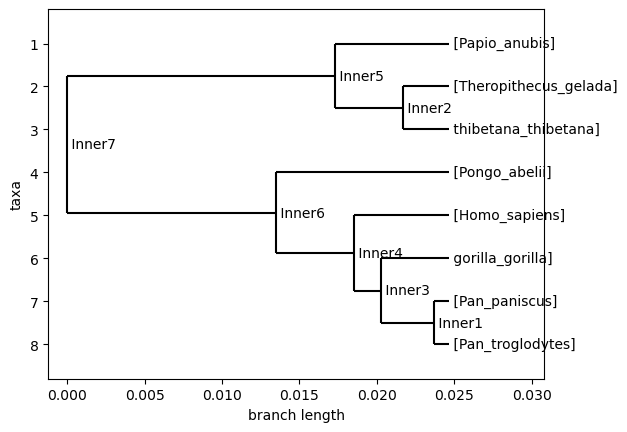

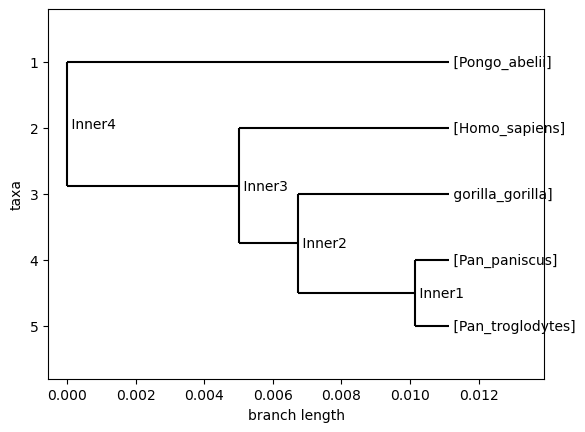

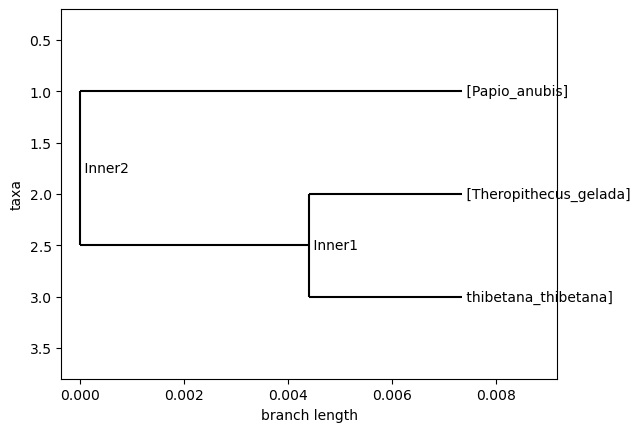

In [10]:
# List of sequence file names and their corresponding identifiers
sequence_files = [
    ('proteins/Alpha-amylase_msa_output_edited.fasta', 'Output_edited'),
    ('proteins/Alpha-amylase_cluster1.fasta', 'Cluster1'),
    ('proteins/Alpha-amylase_cluster2.fasta', 'Cluster2'),
    # Add paths and identifiers for the remaining sequences
]

# Name of the tree file
tree_file = 'trees.dnd'

# Create DistanceTreeConstructor and DistanceCalculator
constructor = DistanceTreeConstructor()
calculator = DistanceCalculator('identity')

# Iterate over the sequence files
for sequence_file, sequence_identifier in sequence_files:
    # Read the alignment file
    aln = AlignIO.read(sequence_file, 'fasta')

    # Calculate the distance matrix
    dm = calculator.get_distance(aln)

    # Build the UPGMA tree
    upgma_tree = constructor.upgma(dm)

    # Draw and display the tree
    Phylo.draw(upgma_tree)

    # Add label to the tree using the comment attribute
    upgma_tree.comment = sequence_identifier

    # Append the labeled tree to the trees file in Newick format
    with open(tree_file, 'a') as f:
        Phylo.write([upgma_tree], f, 'newick')


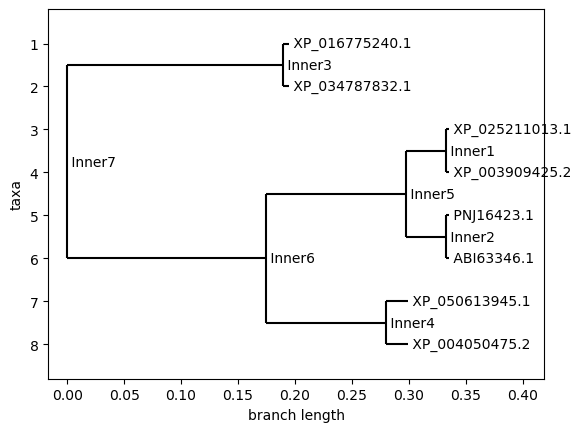

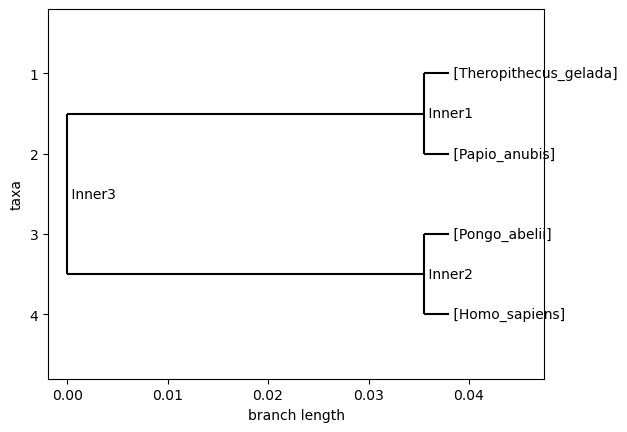

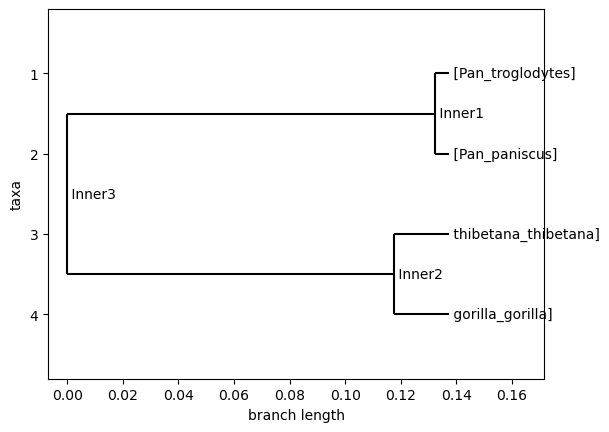

In [11]:
# List of sequence file names and their corresponding identifiers
sequence_files = [
    ('proteins/Insulin_msa_output.fasta', 'Output_edited'),
    ('proteins/Insulin_cluster1.fasta', 'Cluster1'),
    ('proteins/Insulin_cluster2.fasta', 'Cluster2'),
    # Add paths and identifiers for the remaining sequences
]

# Name of the tree file
tree_file = 'trees.dnd'

# Create DistanceTreeConstructor and DistanceCalculator
constructor = DistanceTreeConstructor()
calculator = DistanceCalculator('identity')

# Iterate over the sequence files
for sequence_file, sequence_identifier in sequence_files:
    # Read the alignment file
    aln = AlignIO.read(sequence_file, 'fasta')

    # Calculate the distance matrix
    dm = calculator.get_distance(aln)

    # Build the UPGMA tree
    upgma_tree = constructor.upgma(dm)

    # Draw and display the tree
    Phylo.draw(upgma_tree)

    # Add label to the tree using the comment attribute
    upgma_tree.comment = sequence_identifier

    # Append the labeled tree to the trees file in Newick format
    with open(tree_file, 'a') as f:
        Phylo.write([upgma_tree], f, 'newick')


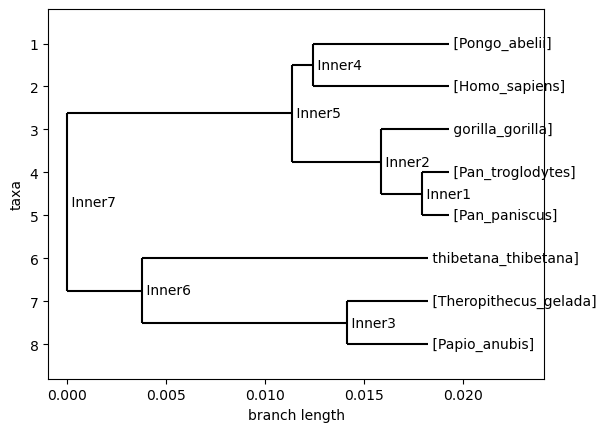

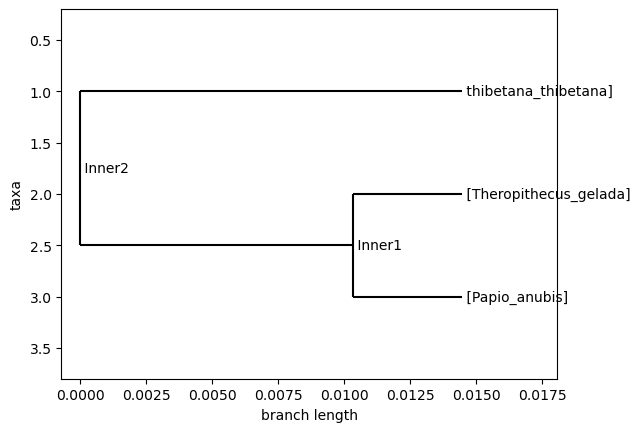

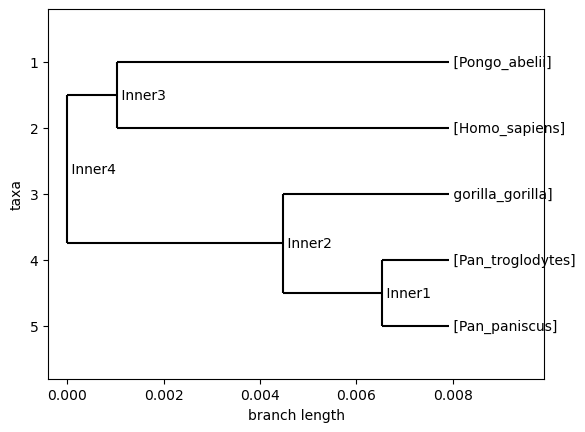

In [12]:
# List of sequence file names and their corresponding identifiers
sequence_files = [
    ('proteins/Adenosine_msa_output_edited.fasta', 'Output_edited'),
    ('proteins/Adenosine_cluster1.fasta', 'Cluster1'),
    ('proteins/Adenosine_cluster2.fasta', 'Cluster2'),
    # Add paths and identifiers for the remaining sequences
]

# Name of the tree file
tree_file = 'trees.dnd'

# Create DistanceTreeConstructor and DistanceCalculator
constructor = DistanceTreeConstructor()
calculator = DistanceCalculator('identity')

# Iterate over the sequence files
for sequence_file, sequence_identifier in sequence_files:
    # Read the alignment file
    aln = AlignIO.read(sequence_file, 'fasta')

    # Calculate the distance matrix
    dm = calculator.get_distance(aln)

    # Build the UPGMA tree
    upgma_tree = constructor.upgma(dm)

    # Draw and display the tree
    Phylo.draw(upgma_tree)

    # Add label to the tree using the comment attribute
    upgma_tree.comment = sequence_identifier

    # Append the labeled tree to the trees file in Newick format
    with open(tree_file, 'a') as f:
        Phylo.write([upgma_tree], f, 'newick')


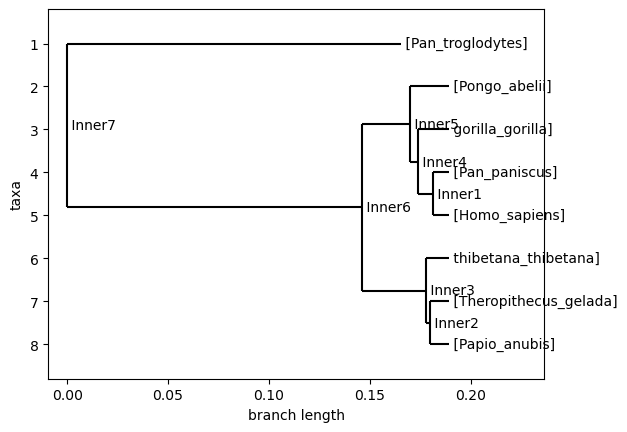

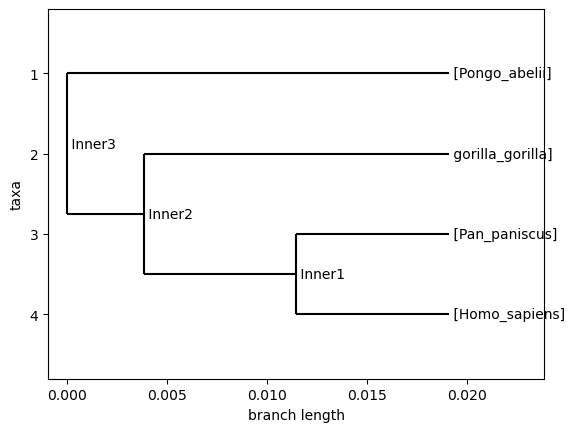

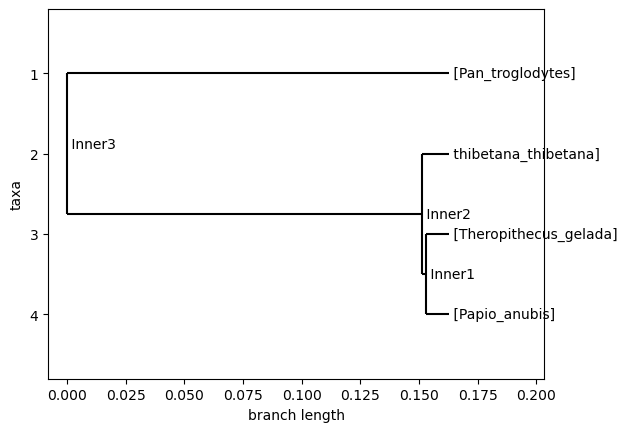

In [13]:
# List of sequence file names and their corresponding identifiers
sequence_files = [
    ('proteins/Kallikrein_msa_output_edited.fasta', 'Output_edited'),
    ('proteins/Kallikrein_cluster1.fasta', 'Cluster1'),
    ('proteins/Kallikrein_cluster2.fasta', 'Cluster2'),
    # Add paths and identifiers for the remaining sequences
]

# Name of the tree file
tree_file = 'trees.dnd'

# Create DistanceTreeConstructor and DistanceCalculator
constructor = DistanceTreeConstructor()
calculator = DistanceCalculator('identity')

# Iterate over the sequence files
for sequence_file, sequence_identifier in sequence_files:
    # Read the alignment file
    aln = AlignIO.read(sequence_file, 'fasta')

    # Calculate the distance matrix
    dm = calculator.get_distance(aln)

    # Build the UPGMA tree
    upgma_tree = constructor.upgma(dm)

    # Draw and display the tree
    Phylo.draw(upgma_tree)

    # Add label to the tree using the comment attribute
    upgma_tree.comment = sequence_identifier

    # Append the labeled tree to the trees file in Newick format
    with open(tree_file, 'a') as f:
        Phylo.write([upgma_tree], f, 'newick')


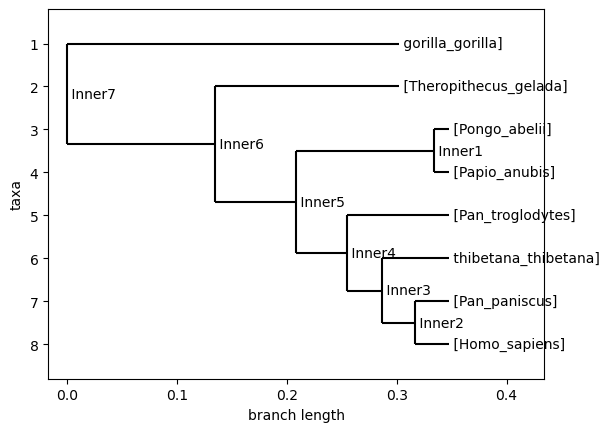

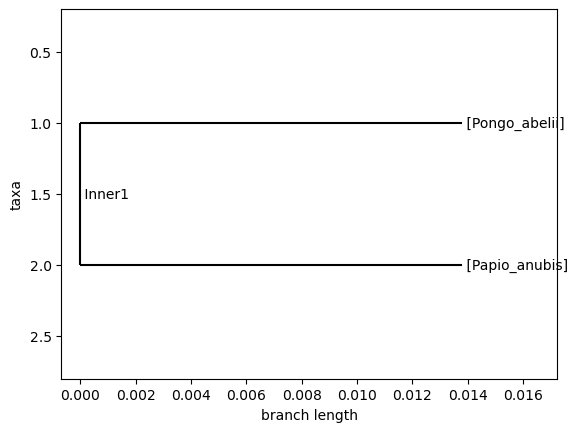

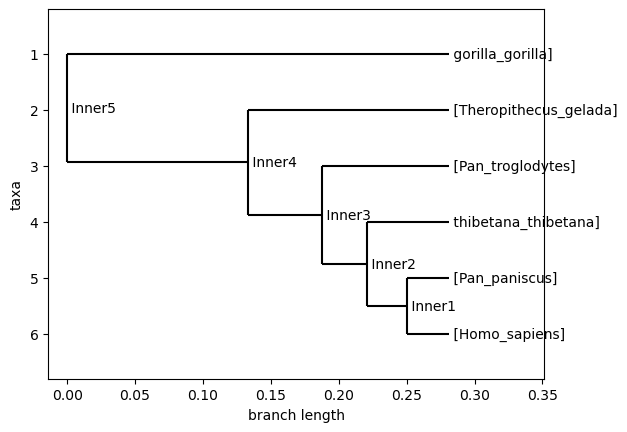

In [14]:
# List of sequence file names and their corresponding identifiers
sequence_files = [
    ('proteins/Thymosin_msa_output_edited.fasta', 'Output_edited'),
    ('proteins/Thymosin_cluster1.fasta', 'Cluster1'),
    ('proteins/Thymosin_cluster2.fasta', 'Cluster2'),
    # Add paths and identifiers for the remaining sequences
]

# Name of the tree file
tree_file = 'trees.dnd'

# Create DistanceTreeConstructor and DistanceCalculator
constructor = DistanceTreeConstructor()
calculator = DistanceCalculator('identity')

# Iterate over the sequence files
for sequence_file, sequence_identifier in sequence_files:
    # Read the alignment file
    aln = AlignIO.read(sequence_file, 'fasta')

    # Calculate the distance matrix
    dm = calculator.get_distance(aln)

    # Build the UPGMA tree
    upgma_tree = constructor.upgma(dm)

    # Draw and display the tree
    Phylo.draw(upgma_tree)

    # Add label to the tree using the comment attribute
    upgma_tree.comment = sequence_identifier

    # Append the labeled tree to the trees file in Newick format
    with open(tree_file, 'a') as f:
        Phylo.write([upgma_tree], f, 'newick')


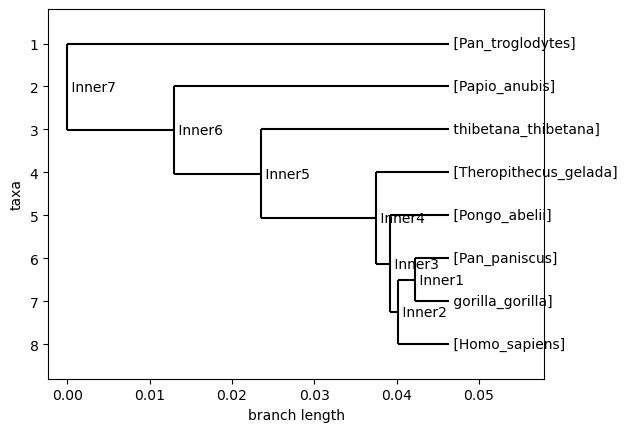

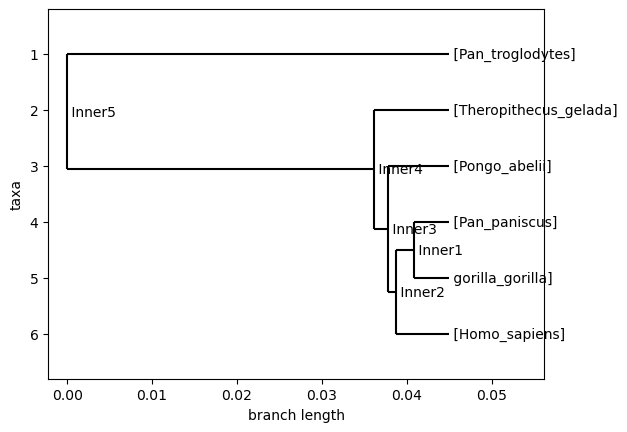

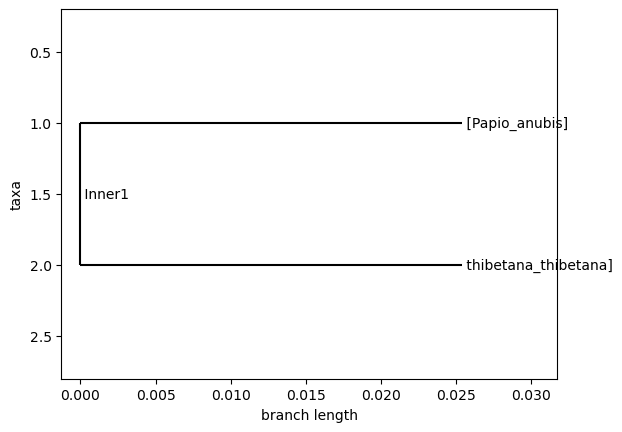

In [15]:
# List of sequence file names and their corresponding identifiers
sequence_files = [
    ('proteins/Calsyntenin_msa_output_edited.fasta', 'Output_edited'),
    ('proteins/Calsyntenin_cluster1.fasta', 'Cluster1'),
    ('proteins/Calsyntenin_cluster2.fasta', 'Cluster2'),
    # Add paths and identifiers for the remaining sequences
]

# Name of the tree file
tree_file = 'trees.dnd'

# Create DistanceTreeConstructor and DistanceCalculator
constructor = DistanceTreeConstructor()
calculator = DistanceCalculator('identity')

# Iterate over the sequence files
for sequence_file, sequence_identifier in sequence_files:
    # Read the alignment file
    aln = AlignIO.read(sequence_file, 'fasta')

    # Calculate the distance matrix
    dm = calculator.get_distance(aln)

    # Build the UPGMA tree
    upgma_tree = constructor.upgma(dm)

    # Draw and display the tree
    Phylo.draw(upgma_tree)

    # Add label to the tree using the comment attribute
    upgma_tree.comment = sequence_identifier

    # Append the labeled tree to the trees file in Newick format
    with open(tree_file, 'a') as f:
        Phylo.write([upgma_tree], f, 'newick')


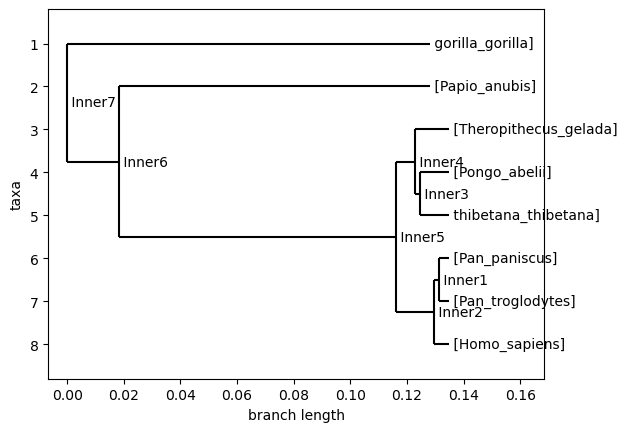

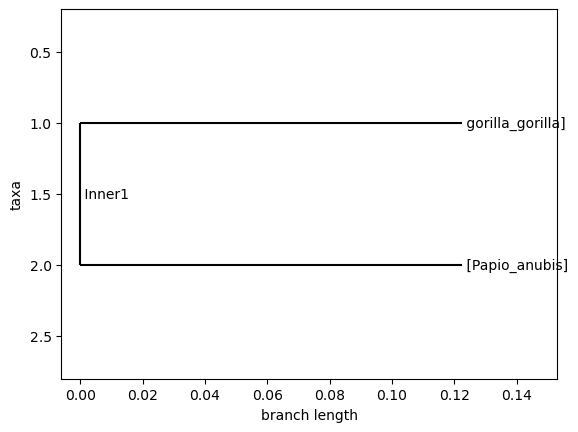

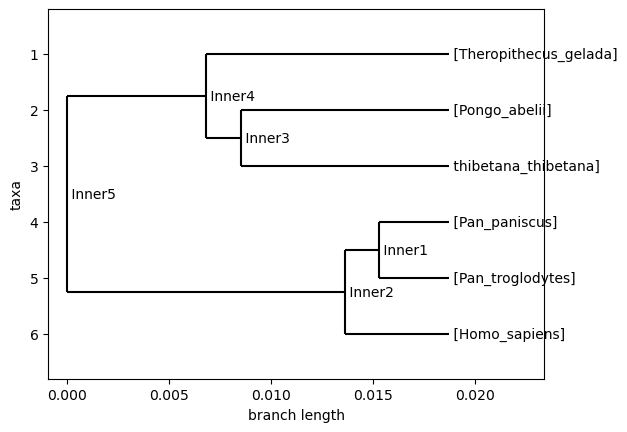

In [16]:
# List of sequence file names and their corresponding identifiers
sequence_files = [
    ('proteins/Hemoglobin_msa_output_edited.fasta', 'Output_edited'),
    ('proteins/Hemoglobin_cluster1.fasta', 'Cluster1'),
    ('proteins/Hemoglobin_cluster2.fasta', 'Cluster2'),
    # Add paths and identifiers for the remaining sequences
]

# Name of the tree file
tree_file = 'trees.dnd'

# Create DistanceTreeConstructor and DistanceCalculator
constructor = DistanceTreeConstructor()
calculator = DistanceCalculator('identity')

# Iterate over the sequence files
for sequence_file, sequence_identifier in sequence_files:
    # Read the alignment file
    aln = AlignIO.read(sequence_file, 'fasta')

    # Calculate the distance matrix
    dm = calculator.get_distance(aln)

    # Build the UPGMA tree
    upgma_tree = constructor.upgma(dm)

    # Draw and display the tree
    Phylo.draw(upgma_tree)

    # Add label to the tree using the comment attribute
    upgma_tree.comment = sequence_identifier

    # Append the labeled tree to the trees file in Newick format
    with open(tree_file, 'a') as f:
        Phylo.write([upgma_tree], f, 'newick')


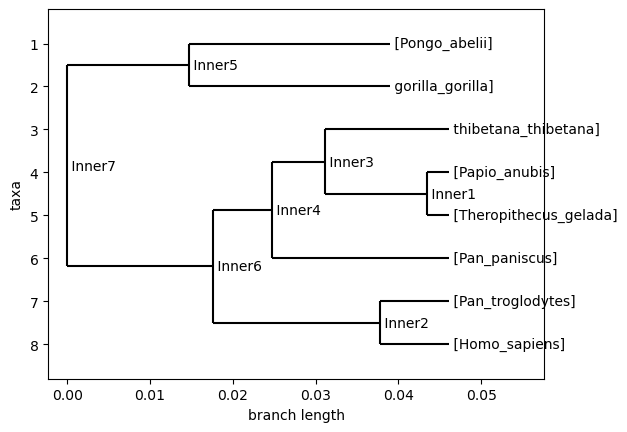

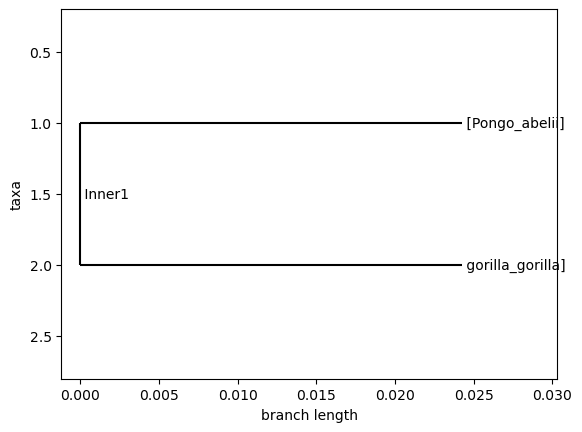

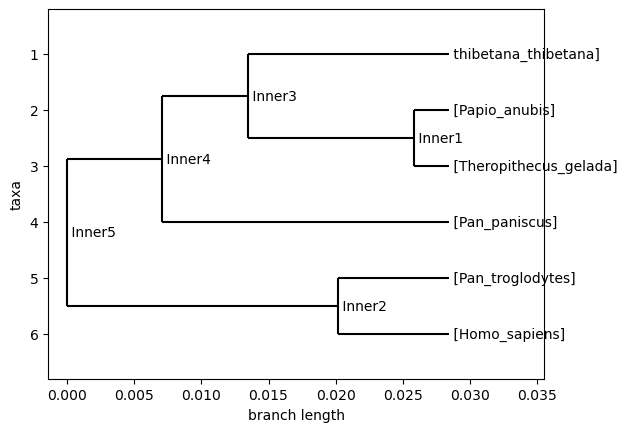

In [17]:
# List of sequence file names and their corresponding identifiers
sequence_files = [
    ('proteins/Collagen_msa_output_edited.fasta', 'Output_edited'),
    ('proteins/Collagen_cluster1.fasta', 'Cluster1'),
    ('proteins/Collagen_cluster2.fasta', 'Cluster2'),
    # Add paths and identifiers for the remaining sequences
]

# Name of the tree file
tree_file = 'trees.dnd'

# Create DistanceTreeConstructor and DistanceCalculator
constructor = DistanceTreeConstructor()
calculator = DistanceCalculator('identity')

# Iterate over the sequence files
for sequence_file, sequence_identifier in sequence_files:
    # Read the alignment file
    aln = AlignIO.read(sequence_file, 'fasta')

    # Calculate the distance matrix
    dm = calculator.get_distance(aln)

    # Build the UPGMA tree
    upgma_tree = constructor.upgma(dm)

    # Draw and display the tree
    Phylo.draw(upgma_tree)

    # Add label to the tree using the comment attribute
    upgma_tree.comment = sequence_identifier

    # Append the labeled tree to the trees file in Newick format
    with open(tree_file, 'a') as f:
        Phylo.write([upgma_tree], f, 'newick')


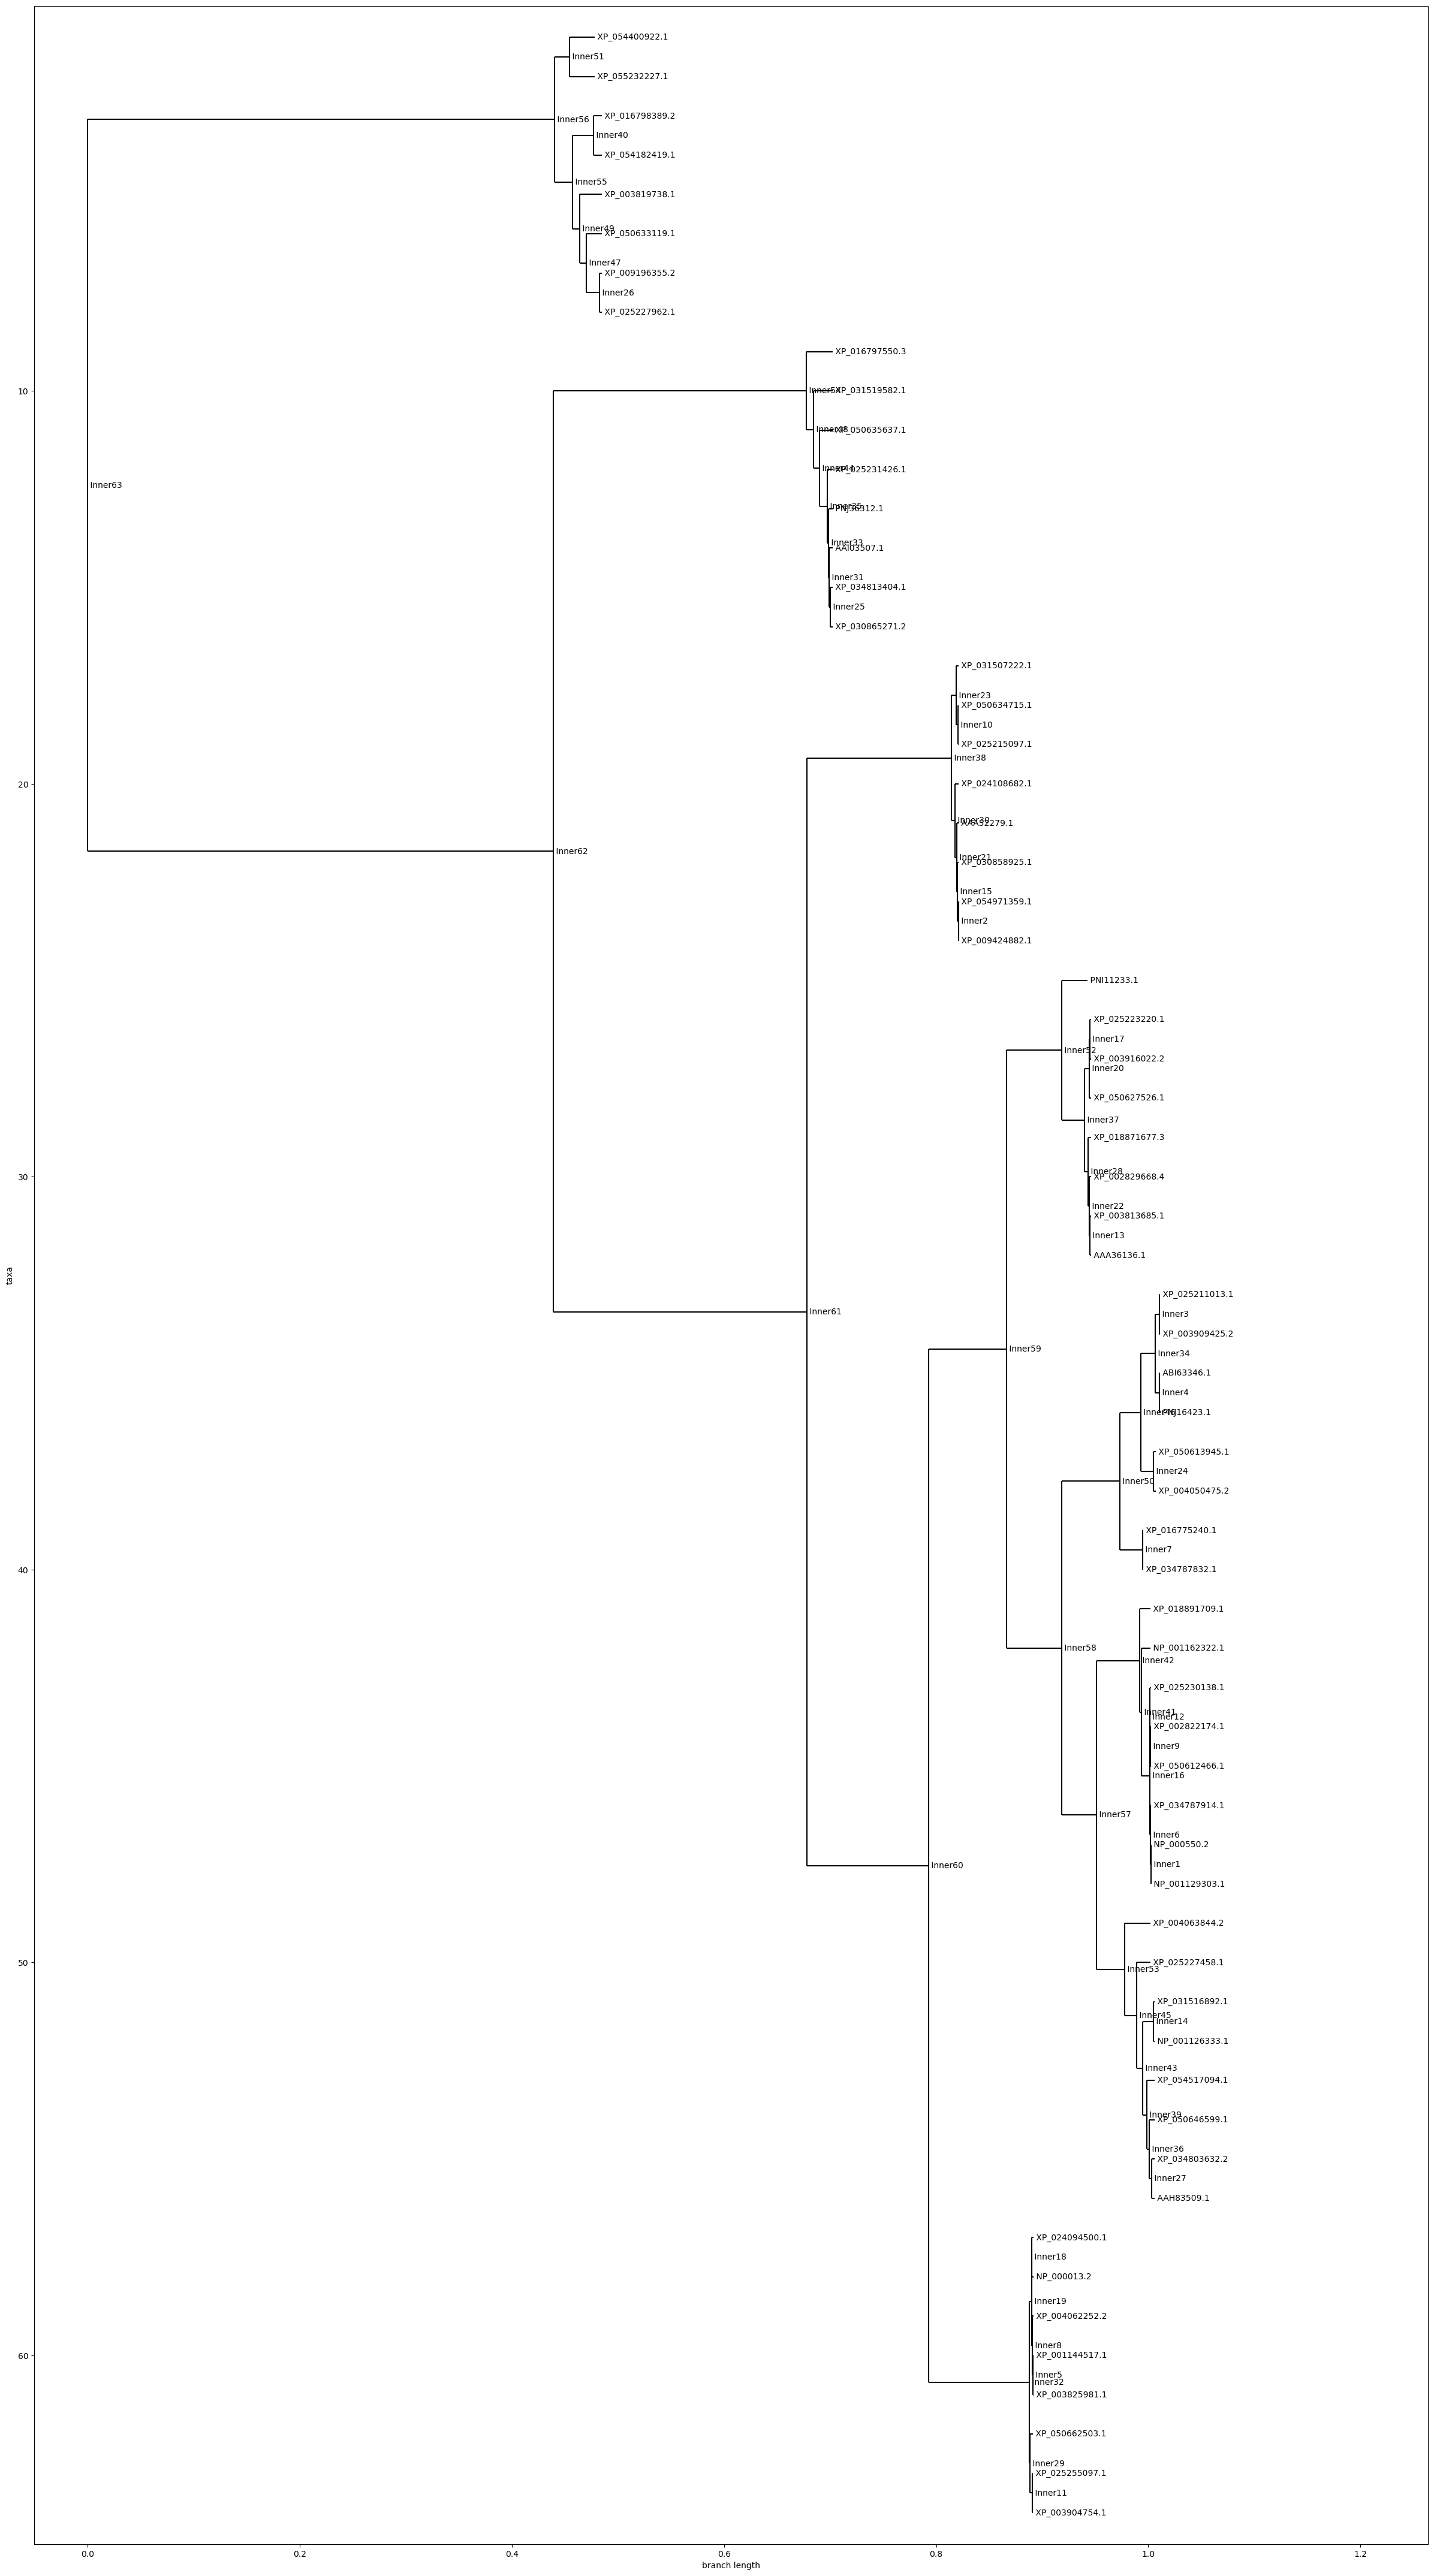

In [18]:
# List of sequence file names and their corresponding identifiers
sequence_files = [
    ('proteins/AllSequences_msa_output.fasta', 'Output_edited'),
    # Add paths and identifiers for the remaining sequences
]

# Name of the tree file
#tree_file = 'trees.dnd'
plt.rcParams['figure.figsize'] = [30,55]

# Create DistanceTreeConstructor and DistanceCalculator
constructor = DistanceTreeConstructor()
calculator = DistanceCalculator('identity')

# Iterate over the sequence files
for sequence_file, sequence_identifier in sequence_files:
    # Read the alignment file
    aln = AlignIO.read(sequence_file, 'fasta')

    # Calculate the distance matrix
    dm = calculator.get_distance(aln)

    # Build the UPGMA tree
    upgma_tree = constructor.upgma(dm)

    # Draw and display the tree
    Phylo.draw(upgma_tree)
    
    plt.rcParams['figure.figsize'] = [15, 4.8]

    # Add label to the tree using the comment attribute
    upgma_tree.comment = sequence_identifier

    # Append the labeled tree to the trees file in Newick format
    with open(tree_file, 'a') as f:
        Phylo.write([upgma_tree], f, 'newick')


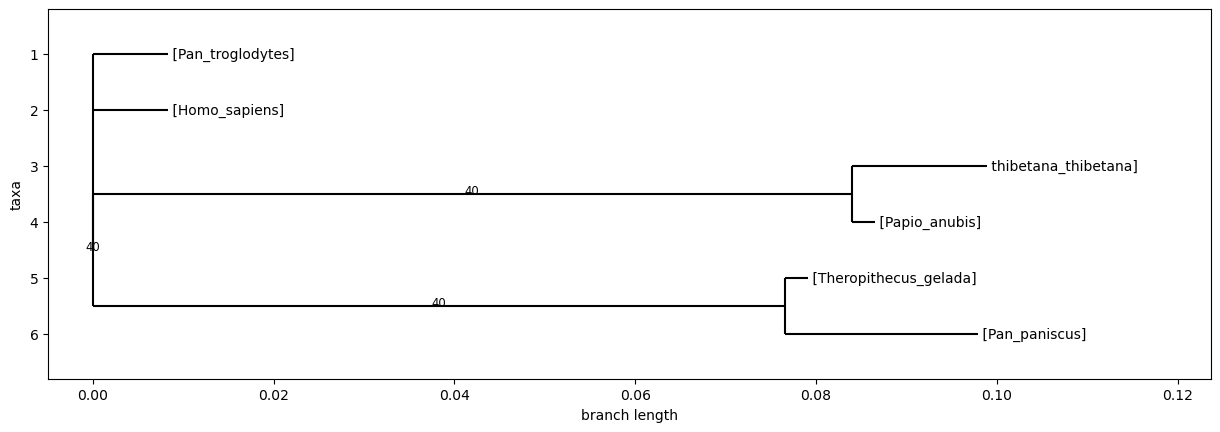

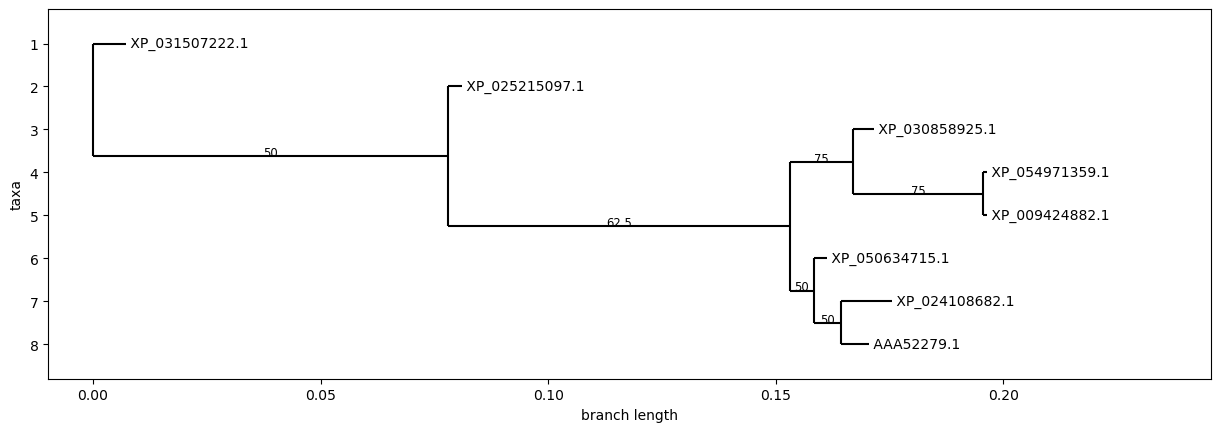

1

In [25]:
def read_alignment(file_path):
    return AlignIO.read(file_path, 'fasta')

def create_upgma_tree(alignment):
    calculator = DistanceCalculator('identity')
    constructor = DistanceTreeConstructor()
    dm = calculator.get_distance(alignment)
    tree = constructor.upgma(dm)
    return tree

def create_consensus_tree(trees, thresholds):
    failed_thresholds = []
    for threshold in thresholds:
        try:
            consensus_tree = majority_consensus(trees, cutoff=threshold)
            return consensus_tree
        except ValueError:
            failed_thresholds.append(threshold)
            continue
    error_message = f"Consensus tree cannot be created for thresholds: {failed_thresholds}"
    raise ValueError(error_message)

# Paths to sequence files
cluster_files = [
    #'proteins/Alpha-amylase_cluster1.fasta',
    #'proteins/Alpha-amylase_cluster2.fasta',
    #'proteins/Collagen_cluster1.fasta',
    'proteins/Collagen_cluster2.fasta',
    'proteins/Insulin_cluster1.fasta',
    'proteins/Insulin_cluster2.fasta',
    #'proteins/Adenosine_cluster1.fasta',
    'proteins/Adenosine_cluster2.fasta',
    #'proteins/Thymosin_cluster1.fasta',
    'proteins/Thymosin_cluster2.fasta',
    #'proteins/Calsyntenin_cluster1.fasta',
    #'proteins/Calsyntenin_cluster2.fasta',
    #'proteins/Kallikrein_cluster1.fasta',
    #'proteins/Kallikrein_cluster2.fasta',
    #'proteins/Hemoglobin_cluster1.fasta',
    #'proteins/Hemoglobin_cluster2.fasta'
]


group_files = [
    'proteins/Alpha-amylase_msa_output.fasta',
    'proteins/Collagen_msa_output.fasta',
    'proteins/Hemoglobin_msa_output.fasta',
    'proteins/Insulin_msa_output.fasta',
    'proteins/Adenosine_msa_output.fasta',
    'proteins/Thymosin_msa_output.fasta',
    'proteins/Kallikrein_msa_output.fasta',
    'proteins/Calsyntenin_msa_output.fasta'
]

# Read sequence files and create UPGMA trees
cluster_trees = [create_upgma_tree(read_alignment(file)) for file in cluster_files]
group_trees = [create_upgma_tree(read_alignment(file)) for file in group_files]

# Create consensus trees with specified thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
cluster_consensus = create_consensus_tree(cluster_trees, thresholds)
group_consensus = create_consensus_tree(group_trees, thresholds)

# Visualize or save the consensus trees
plt.rcParams['figure.figsize'] = [15, 4.8]
Phylo.draw(cluster_consensus)
Phylo.draw(group_consensus)

# Save consensus trees to Newick format
Phylo.write(cluster_consensus, 'cluster_majority_consensus_tree.newick', 'newick')
Phylo.write(group_consensus, 'group_majority_consensus_tree.newick', 'newick')
